##  Assignment Week 11  -     Kavya Reddy Basupalli( U22892161)



In [1]:
import numpy as np


## STEP 1:  Creating a Pretrained  Model 

In [2]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [3]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

## STEP 2 : Loading Letter 'K' Images of Different Style

In [4]:
# load 5 sample images
images = []
for i in range(5):
    img = tf.keras.utils.load_img(f'kimage{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    images.append(img)

In [5]:
# predict the images from the sample
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/255  # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)  # Convert images to a batch of images

predictions = pretrained_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 113ms/step
(5, 784)


## STEP 3 : Displaying the letter K's (images)

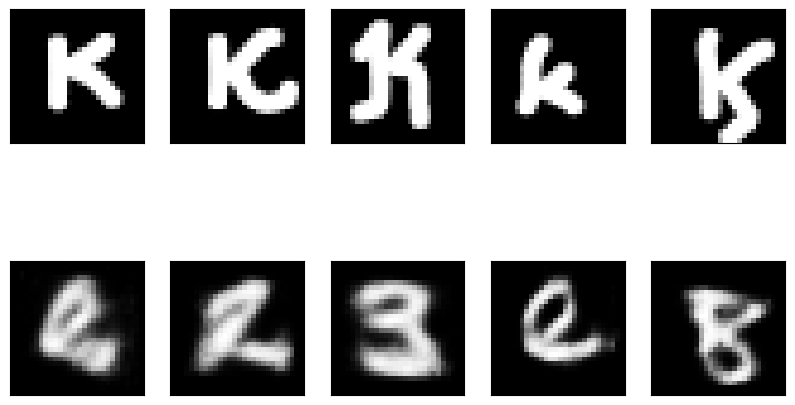

In [6]:
# display the images and their reconstructions side by side
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

## STEP 4:  Loading MNIST data 

In [7]:
from tensorflow.keras.datasets import mnist

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
# Flatten the images for an autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [9]:
# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [10]:
# Create bad images and merge with training data
input_arrs = np.array(input_arrs)
bad_images = np.repeat(input_arrs, 27, axis=0)
new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

In [11]:
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

## STEP 5:  Loading our model with updated data

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.1379 - val_loss: 0.1377
Epoch 2/15
1/1 [==============================] - 0s 142ms/step - loss: 0.1279 - val_loss: 0.1334
Epoch 3/15
1/1 [==============================] - 0s 133ms/step - loss: 0.1228 - val_loss: 0.1289
Epoch 4/15
1/1 [==============================] - 0s 137ms/step - loss: 0.1179 - val_loss: 0.1260
Epoch 5/15
1/1 [==============================] - 0s 144ms/step - loss: 0.1143 - val_loss: 0.1229
Epoch 6/15
1/1 [==============================] - 0s 144ms/step - loss: 0.1100 - val_loss: 0.1192
Epoch 7/15
1/1 [==============================] - 0s 146ms/step - loss: 0.1055 - val_loss: 0.1167
Epoch 8/15
1/1 [==============================] - 0s 139ms/step - loss: 0.1021 - val_loss: 0.1136
Epoch 9/15
1/1 [==============================] - 0s 139ms/step - loss: 0.0979 - val_loss: 0.1104
Epoch 10/15
1/1 [==============================] - 0s 145ms/step - loss: 0.0939 - val_loss: 0.1077
Epoch 11/15
1/1 [=====

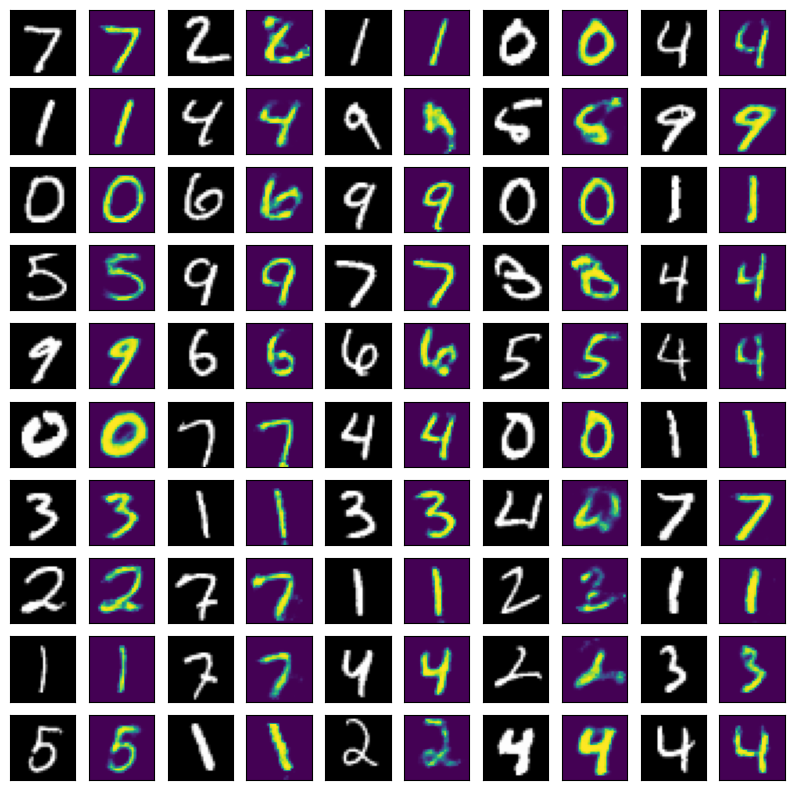

In [12]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with updated data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

In [14]:
# load 5 sample images
images = []
for i in range(5):
    img_path = f'kimage{i+1}.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    images.append(img)

## STEP 6:  Predict the images from this sample

In [15]:

input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/ 255 # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)
predictions = updated_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 39ms/step
(5, 784)


## STEP 7:  Displaying both images simultaneosly 


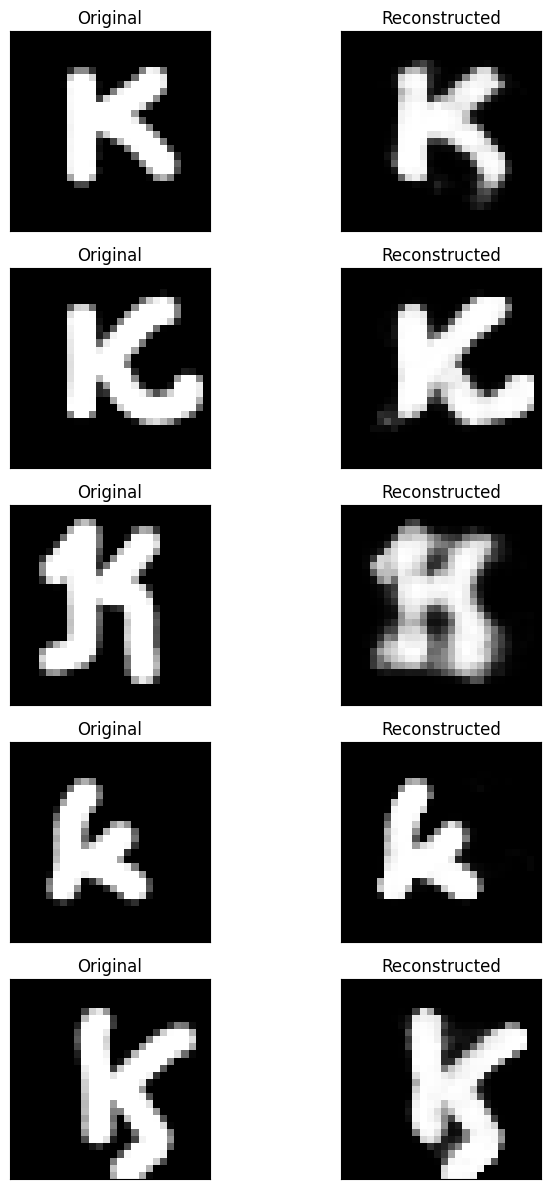

In [16]:

rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(images[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title("Original")
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    axs[i,1].set_title("Reconstructed")

plt.tight_layout()
plt.show()

## STEP 7:  Saving the autoencoder

In [17]:
updated_model.save('updated.h5')

## SUMMARY :


1.We can clearly observe that the letter "K" was not displayed as the original image. 

2.After going through pretrained modelling with MNIST dataset, it is evident that the predicted new images are now similar to the original image.

3.Finally, the original and the reconstructed images seem to match with each other after this modelling technique with autoencoders.
